In [152]:
# Importing dependencies

%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

from sklearn import metrics
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [153]:
# Importing data from csv

url="TSLA.csv"
df = pd.read_csv(url, sep=',')
df.head(1)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,3.8,5.0,3.508,4.778,4.778,93831500


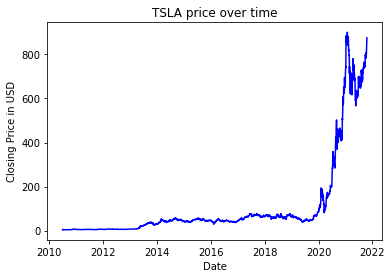

In [154]:
# Plot price over time

# convert dates to dattime objects
dates = matplotlib.dates.date2num(df['Date'])

plt.plot_date(dates, 'High', 'b-', data=df)

plt.title('TSLA price over time')
plt.xlabel('Date')
plt.ylabel('Closing Price in USD')

plt.show()

In [155]:
# Make a correlational matrix from the dataframe

# We need to change the date format to numeric

df.Date=pd.to_datetime(df.Date)
df.Date=pd.to_numeric(df.Date)
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1277769600000000000,3.800,5.000,3.508,4.778,4.778,93831500
1,1277856000000000000,5.158,6.084,4.660,4.766,4.766,85935500
2,1277942400000000000,5.000,5.184,4.054,4.392,4.392,41094000
3,1278028800000000000,4.600,4.620,3.742,3.840,3.840,25699000
4,1278374400000000000,4.000,4.000,3.166,3.222,3.222,34334500


In [156]:
# Draw a correlationplot

corrMatrix = df.corr()
corrMatrix.style.background_gradient(cmap='coolwarm')

,Date,Open,High,Low,Close,Adj Close,Volume
Date,1.000000,0.641732,0.642373,0.641241,0.641787,0.641787,0.465322
Open,0.641732,1.000000,0.999765,0.999691,0.999447,0.999447,0.142161
High,0.642373,0.999765,1.000000,0.999609,0.999771,0.999771,0.147257
Low,0.641241,0.999691,0.999609,1.000000,0.999688,0.999688,0.136844
Close,0.641787,0.999447,0.999771,0.999688,1.000000,1.000000,0.143022
Adj Close,0.641787,0.999447,0.999771,0.999688,1.000000,1.000000,0.143022
Volume,0.465322,0.142161,0.147257,0.136844,0.143022,0.143022,1.000000


In [157]:
# Lets train a model
scaler = preprocessing.MinMaxScaler().fit(x)

x = df.values
x = scaler.inverse_transform(x)
df = pd.DataFrame(x)
df.head()

,0,1,2,3,4,5,6
0,1.626184e+53,3.000363e+06,4.026696e+06,2.649296e+06,3.702279e+06,3.702279e+06,8.677323e+24
1,1.626294e+53,4.071573e+06,4.899036e+06,3.518449e+06,3.692987e+06,3.692987e+06,7.947119e+24
2,1.626404e+53,3.946940e+06,4.174769e+06,3.061238e+06,3.403408e+06,3.403408e+06,3.800280e+24
3,1.626514e+53,3.631415e+06,3.720894e+06,2.825843e+06,2.976007e+06,2.976007e+06,2.376585e+24
4,1.626954e+53,3.158126e+06,3.221954e+06,2.391266e+06,2.497504e+06,2.497504e+06,3.175176e+24


In [158]:
# Split into training and testing set

X = pd.DataFrame(df[0]) #Date
y = pd.DataFrame(df[4]) #Close

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

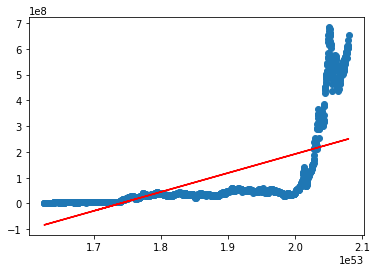

MSE = 1.3106388142743852e+16


In [159]:
# Create a linear regressor model

linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X_train, y_train)  # perform linear regression
Y_pred = linear_regressor.predict(X_train)  # make predictions

# Plot prediction against result

plt.scatter(X_train, y_train)             #Plot blue dots with real data
plt.plot(X_train, Y_pred, color='red')    #Plot red line with prediction
plt.show()                                #Show the plot
print( "MSE = "+str(metrics.mean_squared_error(y_train,Y_pred))) #Calculate MSE

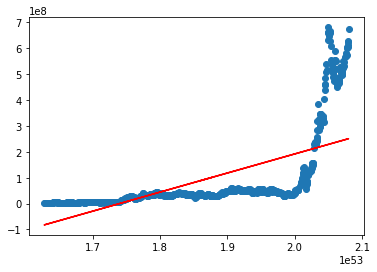

MSE = 1.1874006293359962e+16


In [160]:
# Check how good the model works on the test data

Y_pred = linear_regressor.predict(X_test)  # Predict the model on X_test
plt.scatter(X_test, y_test)
plt.plot(X_test, Y_pred, color='red')
plt.show()
print( "MSE = "+str(metrics.mean_squared_error(y_test,Y_pred)))

In [161]:
# Lets test our model with todays date

first_date  = 1277769600000000000
todays_date = 1634668674000000000

# linear_regressor.predict([[first_date]])
linear_regressor.predict([[todays_date]])


array([[-1.27916725e+09]])